**Exporting libraries**

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import pickle
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter, defaultdict
from operator import itemgetter

drop_list = []

**Loading Necessary Functions**


In [0]:
def pickleLoad(filename):
    with open(filename, "rb") as f:
        filetype = pickle.load(f)
    return filetype

def pickleUnload(filename,filetype):
    with open(filename, "wb") as f:
        pickle.dump(filetype, f)

def one_hot(df, cols):
    for each in cols:
        try:
            one_hot = pd.get_dummies(df[each], prefix=each,drop_first=True)
            df = df.join(one_hot)
        except:
            continue
    df.drop(cols, axis=1,inplace=True)
    return df

def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
    distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
    return np.mean(distances)

**Reading the data file**

In [31]:
df = pd.read_csv('more_than_50k.csv')
df

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,57,Self-employed-incorporated,11,2,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
1,44,Private,3,38,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,No,1,48,94
2,54,Private,19,26,High school graduate,1550,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,25,Private,33,2,9th grade,0,Not in universe,Never married,Retail trade,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95
4,26,Private,11,5,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
5,44,Private,42,2,Some college but no degree,0,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,40,94
6,64,Self-employed-incorporated,34,2,Doctorate degree(PhD EdD),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,Not in universe,South Korea,South Korea,South Korea,Foreign born- U S citizen by naturalization,1,Not in universe,2,52,95
7,44,Self-employed-not incorporated,4,2,12th grade no diploma,0,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
8,31,Self-employed-incorporated,37,2,Some college but no degree,0,Not in universe,Never married,Business and repair services,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
9,31,Private,35,16,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,...,Not in universe,United-States,Scotland,United-States,Native- Born in the United States,0,Not in universe,2,52,95


**Replacing the missing values** 

In [32]:
df.replace(" ?", np.nan, inplace=True)
df

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,57,Self-employed-incorporated,11,2,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
1,44,Private,3,38,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,No,1,48,94
2,54,Private,19,26,High school graduate,1550,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,25,Private,33,2,9th grade,0,Not in universe,Never married,Retail trade,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95
4,26,Private,11,5,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
5,44,Private,42,2,Some college but no degree,0,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,40,94
6,64,Self-employed-incorporated,34,2,Doctorate degree(PhD EdD),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,Not in universe,South Korea,South Korea,South Korea,Foreign born- U S citizen by naturalization,1,Not in universe,2,52,95
7,44,Self-employed-not incorporated,4,2,12th grade no diploma,0,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
8,31,Self-employed-incorporated,37,2,Some college but no degree,0,Not in universe,Never married,Business and repair services,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
9,31,Private,35,16,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,...,Not in universe,United-States,Scotland,United-States,Native- Born in the United States,0,Not in universe,2,52,95


**Displaying columns and % of null values in them**

In [33]:
print (df.isnull().mean())

AAGE        0.000000
ACLSWKR     0.000000
ADTIND      0.000000
ADTOCC      0.000000
AHGA        0.000000
AHRSPAY     0.000000
AHSCOL      0.000000
AMARITL     0.000000
AMJIND      0.000000
AMJOCC      0.000000
ARACE       0.000000
AREORGN     0.000000
ASEX        0.000000
AUNMEM      0.000000
AUNTYPE     0.000000
AWKSTAT     0.000000
CAPGAIN     0.000000
CAPLOSS     0.000000
DIVVAL      0.000000
FILESTAT    0.000000
GRINREG     0.000000
GRINST      0.003911
HHDFMX      0.000000
HHDREL      0.000000
MIGMTR1     0.532402
MIGMTR3     0.532402
MIGMTR4     0.532402
MIGSAME     0.000000
MIGSUN      0.532402
NOEMP       0.000000
PARENT      0.000000
PEFNTVTY    0.045251
PEMNTVTY    0.037430
PENATVTY    0.025978
PRCITSHP    0.000000
SEOTR       0.000000
VETQVA      0.000000
VETYN       0.000000
WKSWORK     0.000000
YEAR        0.000000
dtype: float64


**Deleting columns with more than 40% of null values**

In [34]:
df = df[df.columns[df.isnull().mean() < 0.4]]
df

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,57,Self-employed-incorporated,11,2,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
1,44,Private,3,38,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,No,1,48,94
2,54,Private,19,26,High school graduate,1550,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,25,Private,33,2,9th grade,0,Not in universe,Never married,Retail trade,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95
4,26,Private,11,5,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
5,44,Private,42,2,Some college but no degree,0,Not in universe,Married-civilian spouse present,Medical except hospital,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,40,94
6,64,Self-employed-incorporated,34,2,Doctorate degree(PhD EdD),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,Not in universe,South Korea,South Korea,South Korea,Foreign born- U S citizen by naturalization,1,Not in universe,2,52,95
7,44,Self-employed-not incorporated,4,2,12th grade no diploma,0,Not in universe,Married-civilian spouse present,Construction,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
8,31,Self-employed-incorporated,37,2,Some college but no degree,0,Not in universe,Never married,Business and repair services,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
9,31,Private,35,16,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Sales,...,Not in universe,United-States,Scotland,United-States,Native- Born in the United States,0,Not in universe,2,52,95


**Visualising Histograms from columns**

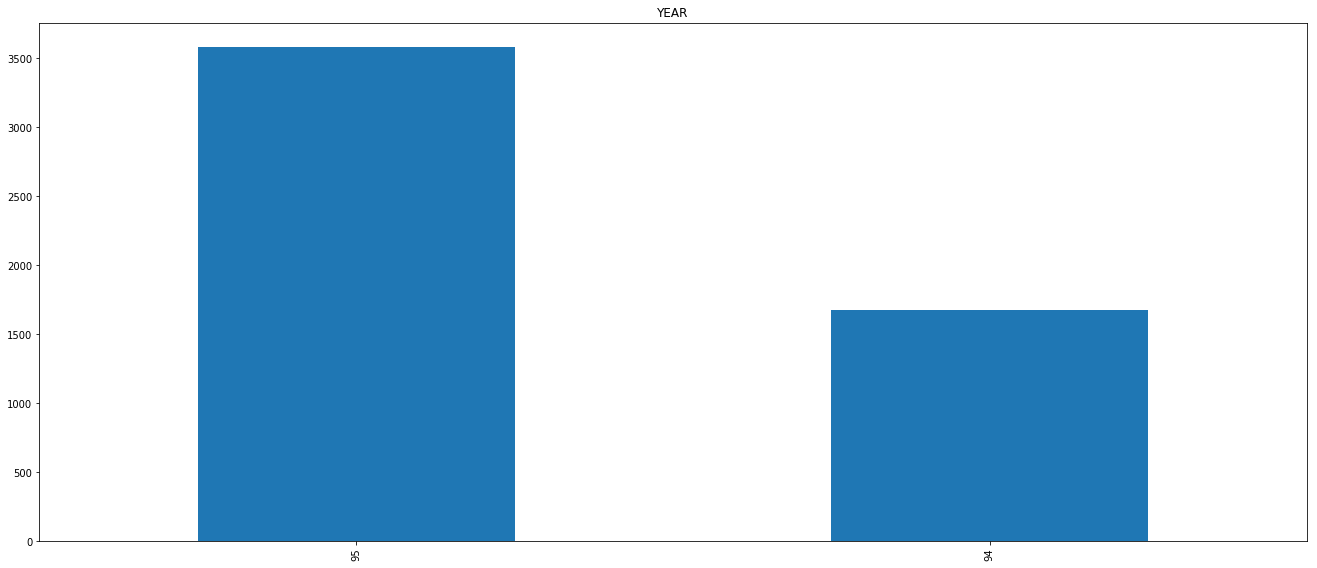

In [35]:
i = 0
for title in list(df):
    plt.subplots_adjust(left=0.07, bottom=0.23, right=0.95, top=0.95, wspace=None, hspace=None)
    df[title].value_counts().plot(figsize=(20,10),kind='bar')
    plot_title = str(title)
    plt.title(plot_title)
#     plt.savefig("p3_data/graphs/50k/"+str(i)+"_"+plot_title)
    i+=1

**Removing Features with 75% same values**

In [0]:
data_size = int(df['GRINST'].size*0.8)
for title in list(df):
    try:
        if (df[title].value_counts()[0] > data_size):
            drop_list.append(title)
    except:
        continue
df.drop(drop_list, axis=1,inplace=True)

**Converting Numerical features to 8 bin**

In [0]:
for y in df.columns:
    if df[y].dtype == np.int64:
        df[y] = pd.cut(df[y],8)

**Converting all the features type to categorical**

In [0]:
for title in list(df):
    df[title] = df[title].astype('category',copy=False)

**Shape and Type of Categories**

In [39]:
print (df.shape)
print (df.dtypes)

(3580, 19)
AAGE        category
ACLSWKR     category
ADTIND      category
ADTOCC      category
AHGA        category
AMARITL     category
AMJIND      category
AMJOCC      category
ASEX        category
AWKSTAT     category
DIVVAL      category
FILESTAT    category
HHDFMX      category
HHDREL      category
MIGSAME     category
NOEMP       category
VETYN       category
WKSWORK     category
YEAR        category
dtype: object


**Replace Missing Values with column's mode**

In [0]:
for column in df.columns:
    df[column].replace(np.nan,df[column].mode()[0], inplace=True)

**One hot encoding**

In [0]:
df = one_hot(df, list(df))
column_name = list(df)

**Graph Plot Cumulative Variance vs Number of Components**

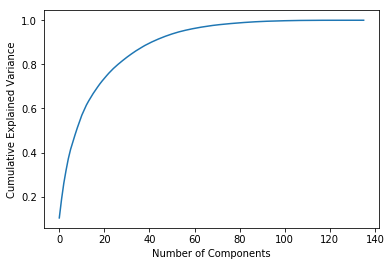

In [47]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

**Fitting PCA with n=75**

In [0]:
pca = PCA(n_components=75)
pca.fit(df)
df_n = pca.transform(df)

**Amount of variance each PC has**

In [49]:
print((pca.explained_variance_ratio_))

[0.10323503 0.08436785 0.07292864 0.058634   0.05251612 0.04218835
 0.03409935 0.03264992 0.0314424  0.02921118 0.0281848  0.02327626
 0.02208006 0.01857568 0.0171877  0.01661922 0.01534311 0.01460909
 0.01417314 0.01313846 0.01231076 0.01189052 0.01150055 0.01071096
 0.01019635 0.00946833 0.00884437 0.00863773 0.00828712 0.00810902
 0.00791795 0.00763446 0.00724511 0.00710163 0.00684745 0.00638504
 0.00626184 0.00603137 0.00596567 0.00534294 0.00520023 0.00497535
 0.00467733 0.00450401 0.00447353 0.00422537 0.00406571 0.0038869
 0.00364042 0.00355366 0.00346796 0.00321922 0.00307943 0.00294189
 0.00266174 0.00249804 0.00243335 0.00232304 0.00222215 0.00204363
 0.00193273 0.00191176 0.00185169 0.00179226 0.00160447 0.00159692
 0.00156434 0.00151696 0.00136019 0.00132072 0.0011544  0.00111692
 0.00107472 0.00102543 0.0009753 ]


**Mapping weights to 1st,2nd,3rd principal component**

In [50]:
for i in range(3):
    print ("**** Principal Component - {} ****".format(i+1))
    A = abs(pca.components_[i])
    ranks = np.argsort(A)
    for a in ranks:
        print ("{} - {}".format(column_name[a],A[a]))
    print ("\n\n")

**** Principal Component - 1 ****
AMJOCC_ Armed Forces_1 - 2.252212423924314e-05
AMJIND_ Armed Forces_1 - 2.252212423924314e-05
AHGA_ 1st 2nd 3rd or 4th grade_1 - 9.72363984129338e-05
WKSWORK_(26.0, 32.5]_1 - 0.00010678595421560261
HHDFMX_ RP of unrelated subfamily_1 - 0.00013605349304816593
DIVVAL_(37499.625, 49999.5]_1 - 0.00022968478665766275
AMJIND_ Private household services_1 - 0.0002549122098350351
HHDFMX_ Spouse of RP of unrelated subfamily_1 - 0.00028670732742767425
ACLSWKR_ Never worked_1 - 0.00030356070631124563
DIVVAL_(49999.5, 62499.375]_1 - 0.0003546179358054957
AHGA_ 11th grade_1 - 0.00043073291721795764
AMARITL_ Married-A F spouse present_1 - 0.00044462434962825475
AMJIND_ Business and repair services_1 - 0.00045651813199629415
AMJIND_ Forestry and fisheries_1 - 0.0005094768258505511
DIVVAL_(62499.375, 74999.25]_1 - 0.0005417560559040921
ADTOCC_(28.75, 34.5]_1 - 0.000554828275995913
AMJIND_ Utilities and sanitary services_1 - 0.0005549057506822059
AHGA_ Associates degre

**K mean clustering distance**

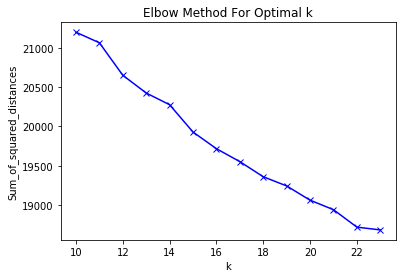

In [51]:
Sum_of_squared_distances = []
K = range(10,24)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_n)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**K mean clustering with n = 22**

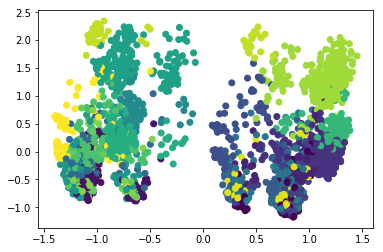

In [52]:
#K mean clustering with n = 22
clusters = 22
kmeans = KMeans(n_clusters=clusters).fit(df_n)
plt.figure('K-means with {} clusters'.format(clusters))
plt.scatter(df_n[:, 0], df_n[:, 1],c=kmeans.labels_)
plt.show()

**Calculates % of data points in each cluster**

In [53]:
count = 0
proportions = []
cluster_count = Counter(kmeans.labels_)
for a in cluster_count.items():
    count += a[1]
for a in cluster_count.items():
    proportions.append([a[0],round((float(a[1])/float(count))*100.0,2)])
print (sorted(proportions, key=itemgetter(0)))

[[0, 4.16], [1, 7.32], [2, 4.16], [3, 7.32], [4, 6.03], [5, 2.63], [6, 3.3], [7, 3.66], [8, 4.8], [9, 4.22], [10, 2.4], [11, 4.41], [12, 6.7], [13, 4.94], [14, 2.79], [15, 4.3], [16, 3.44], [17, 5.5], [18, 9.22], [19, 2.12], [20, 3.69], [21, 2.88]]
